# Análisis gravimétrico exploratorio 

El experimento fallido (pinchadura del envase, exceso de agua) sirvió para observar la dinámica de diferentes procesos:

- Rango de medición de los sensores capacitivos
- Dinámica de la humedad en la tierra según la cantidad en el envase
- Dinámica de la evaporación de agua observando la lectura de la balanza

In [2]:
import pandas as pd
import plotly.graph_objects as go

## Análisis de sensores

- Sensores capacitivos: id 0, id 1
- Sensores sht10: id A, id B

- Columnas del dataset: timestamp;tem_shtA;hum_shtA;tem_shtB;hum_shtB;hum0;hum1



In [17]:
df = pd.read_csv("data/hum_suelo_lab_exploratorio_clean.csv", sep=";", names = ["datetime", "tem_shtA", "hum_shtA", "tem_shtB", "hum_shtB", "hum0", "hum1"], parse_dates=['datetime'])
df.head()

datetime  tem_shtA  hum_shtA  tem_shtB  hum_shtB  hum0  \
0 2019-12-30 16:00:04.339149     25.30     98.07     25.02     98.38   821   
1 2019-12-30 16:00:10.352303     25.31     98.07     25.02     98.38   826   
2 2019-12-30 16:00:13.360415     25.31     98.07     25.02     98.37   838   
3 2019-12-30 16:30:04.759285     25.54     98.23     25.11     98.49   824   
4 2019-12-30 16:30:07.764968     25.54     98.23     25.10     98.46   832   

   hum1  
0   813  
1   822  
2   834  
3   818  
4   832

### Sensores capacitivos
- Hacer: ver valores en el aire y completamente sumergido para saber el rango de 0 a 100, luego usar la función map de arduino `map(analogRead(A0), valorAire, valorAgua, 0, 100)`

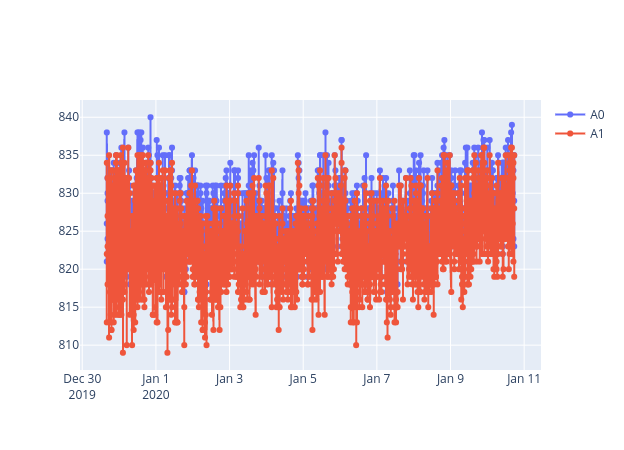

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.datetime, y=df.hum0, mode='markers+lines', name="A0"))
fig.add_trace(go.Scatter(x=df.datetime, y=df.hum1, mode='markers+lines', name="A1"))
fig.show()

### Sensores SHT10

Ambos puestos al aire 

#### Temperatura ambiente

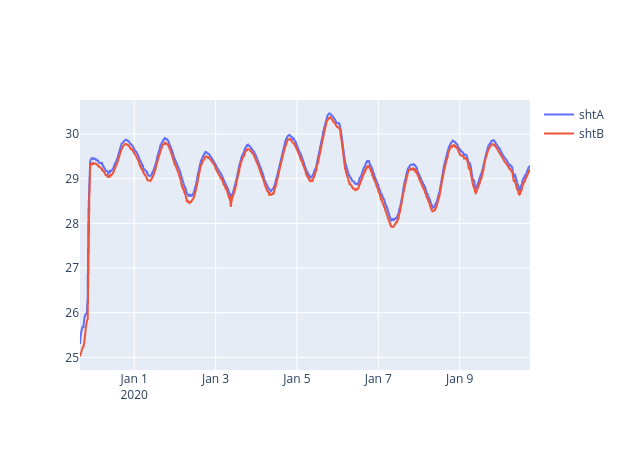

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.datetime, y=df.tem_shtA, mode='lines', name="shtA"))
fig.add_trace(go.Scatter(x=df.datetime, y=df.tem_shtB, mode='lines', name="shtB"))
fig.show()

### Humedad ambiente

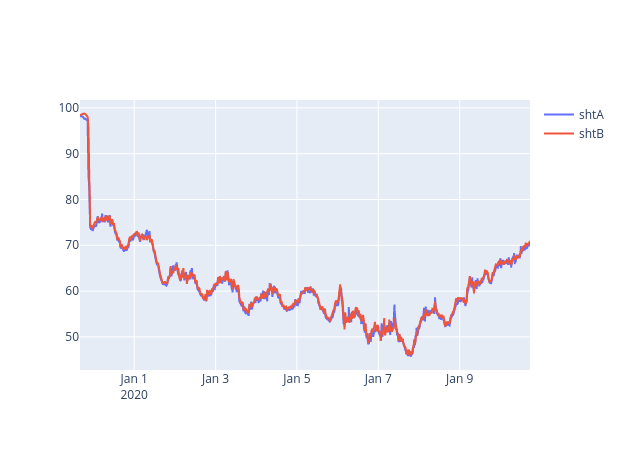

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.datetime, y=df.hum_shtA, mode='lines', name="shtA"))
fig.add_trace(go.Scatter(x=df.datetime, y=df.hum_shtB, mode='lines', name="shtB"))
fig.show()

## Gravimetría: análisis de lecturas en la balanza 

In [9]:
balanza = pd.read_csv("data/balanza_exploratorio.csv", sep=";", names = ["datetime", "peso"], parse_dates=['datetime'])
balanza.head()

datetime    peso
0 2019-12-30 18:00:00  3174.0
1 2019-12-30 18:30:00  3173.4
2 2019-12-30 19:00:00  3172.8
3 2019-12-30 19:30:00  3172.2
4 2019-12-30 20:00:00  3171.6

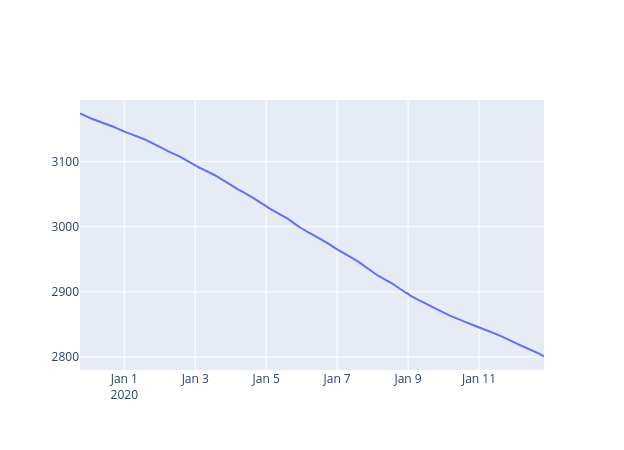

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=balanza.datetime, y=balanza.peso, mode='lines', name="shtA"))
fig.show()

## Sensores capacitivos id 2 y 3

- Probados al aire y sumergidos (a la mitad y total)
- Aire:
    - S2: 620
    - S3: 612
- Mojados:
    - S2: 256
    - S3:

In [3]:
capa2y3 = pd.read_csv("data/capacitivo_c2_c3.csv", sep=";", names = ["datetime", "s2", "s3"], parse_dates=['datetime'])
capa2y3.head()

datetime   s2   s3
0 2020-01-13 16:19:52.803  621  613
1 2020-01-13 16:19:53.035  620  612
2 2020-01-13 16:19:53.300  621  613
3 2020-01-13 16:19:53.565  620  613
4 2020-01-13 16:19:53.797  621  612

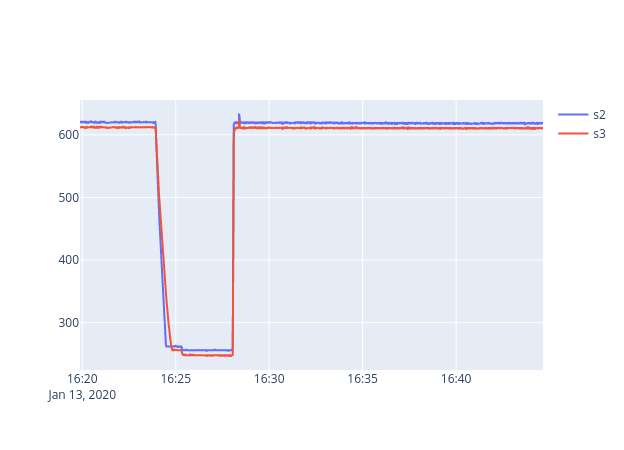

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=capa2y3.datetime, y=capa2y3.s2, mode='lines', name="s2"))
fig.add_trace(go.Scatter(x=capa2y3.datetime, y=capa2y3.s3, mode='lines', name="s3"))
fig.show()

- **Valor del sensor s2 al aire (seco)**

620.095

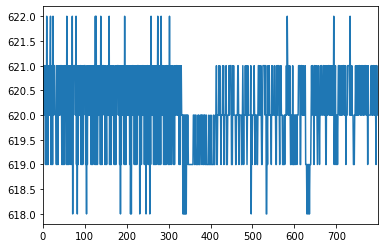

In [16]:
capa2y3["s2"][:800].plot()
capa2y3["s2"][:800].mean()

- Valor del sensor s3 al aire (seco)

612.02125

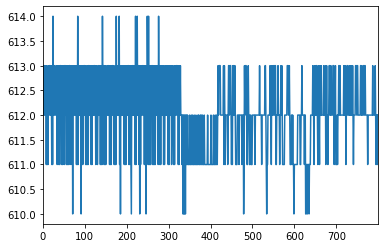

In [17]:
capa2y3["s3"][:800].plot()
capa2y3["s3"][:800].mean()

- Valor del sensor s2 sumergido (mojado)

256.09

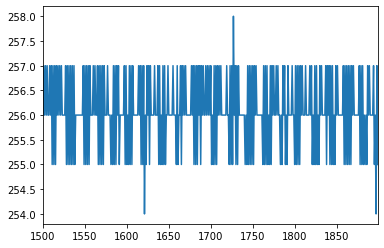

In [21]:
capa2y3["s2"][1500:1900].plot()
capa2y3["s2"][1500:1900].mean()

- Valor del sensor s3 sumergido (modado)

248.0075

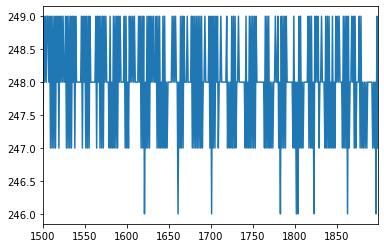

In [22]:
capa2y3["s3"][1500:1900].plot()
capa2y3["s3"][1500:1900].mean()

In [ ]:
- Cubriendo por cuartos (aprox.)

In [5]:
capa2y3_cuartos = pd.read_csv("data/capacitivo_c2_c3_cuartos.csv", sep=";", names = ["datetime", "s2", "s3"], parse_dates=['datetime'])
capa2y3_cuartos.head()

datetime   s2   s3
0 2020-01-13 16:51:00.200  619  611
1 2020-01-13 16:51:00.431  617  609
2 2020-01-13 16:51:00.696  620  611
3 2020-01-13 16:51:00.961  618  610
4 2020-01-13 16:51:01.193  619  612

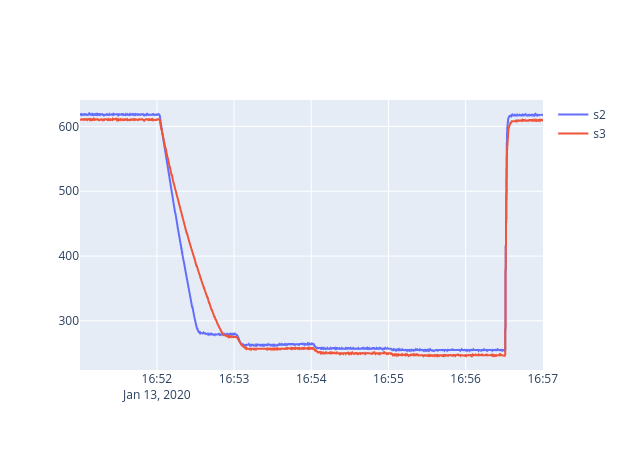

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=capa2y3_cuartos.datetime, y=capa2y3_cuartos.s2, mode='lines', name="s2"))
fig.add_trace(go.Scatter(x=capa2y3_cuartos.datetime, y=capa2y3_cuartos.s3, mode='lines', name="s3"))
fig.show()